In [43]:
from config_voting import *
from nms import nms
from VOCap import VOCap
from copy import *
from itertools import compress

model_category= 'car'
category = 'car'
set_type = 'test'

dir_img = Dataset['img_dir'].format(model_category)
dir_anno = Dataset['anno_dir'].format(model_category)

file_gt_obj_anno = os.path.join(dir_perf_eval, 'gt_anno_{0}_{1}_{2}.pickle'.format(model_category, dataset_suffix, set_type))
assert(os.path.isfile(file_gt_obj_anno))
with open(file_gt_obj_anno, 'rb') as fh:
    gt, n_pos = pickle.load(fh)
    

if category!='all':
    file_det_result = os.path.join(dir_det_result, 'props_det_{0}_{1}_pctl33.pickle'.format(model_category, category))
    with open(file_det_result, 'rb') as fh:
        det = pickle.load(fh)
        
    for dd in det:
        dd['cat']=category
            
else:
    all_rst_file = os.path.join(dir_det_result,'all_score_nms_list.pickle')
    assert(os.path.isfile(all_rst_file))
    with open(all_rst_file, 'rb') as fh:
        score_rst, score_rst2, nms_list_all, nms_list_all2, det = pickle.load(fh)

    assert(img_num_all == len(score_rst))
    
'''
all_rst_file = os.path.join(dir_det_result,'all_score_nms_list.pickle')
assert(os.path.isfile(all_rst_file))
with open(all_rst_file, 'rb') as fh:
    score_rst, score_rst2, nms_list_all, nms_list_all2, det = pickle.load(fh)
    
    
if category!='all':
    msk = [dd['cat']==category for dd in det]
    score_rst = list(compress(score_rst, msk))
    score_rst2 = list(compress(score_rst2, msk))
    nms_list_all = list(compress(nms_list_all, msk))
    nms_list_all2 = list(compress(nms_list_all2, msk))
    det = list(compress(det, msk))
'''

"\nall_rst_file = os.path.join(dir_det_result,'all_score_nms_list.pickle')\nassert(os.path.isfile(all_rst_file))\nwith open(all_rst_file, 'rb') as fh:\n    score_rst, score_rst2, nms_list_all, nms_list_all2, det = pickle.load(fh)\n    \n    \nif category!='all':\n    msk = [dd['cat']==category for dd in det]\n    score_rst = list(compress(score_rst, msk))\n    score_rst2 = list(compress(score_rst2, msk))\n    nms_list_all = list(compress(nms_list_all, msk))\n    nms_list_all2 = list(compress(nms_list_all2, msk))\n    det = list(compress(det, msk))\n"

395.307315696
car:395.3073156962114
389.490212995
car:389.490212995009
374.718189685
car:374.71818968457035
368.813921666
car:368.8139216657207
359.201664072
car:359.2016640717949


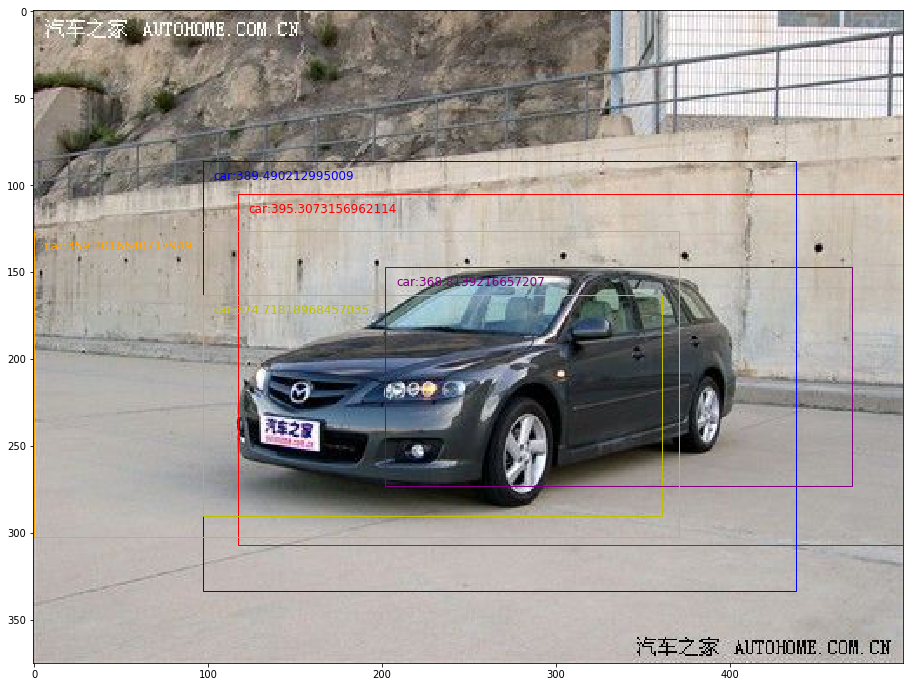

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

score_rst = [dd['score'] for dd in det]

n = 366
img = cv2.imread(det[n]['img_path'])
fig,ax = plt.subplots(1, figsize=(16, 12))
ax.imshow(img[...,::-1])
height, width = img.shape[0:2]
score1 = score_rst[n]
# score2 = score_rst2[n]
bbox = det[n]['box']

'''
score1 = score1[nms_list_all2[n],:]
score2 = score2[nms_list_all2[n],:]
bbox = bbox[nms_list_all2[n],:]
'''

score_now = score1
start_bb = 10
num_bb = 5

# idx_s = np.argsort(-np.max(score_now, axis=1))
idx_s = np.argsort(-score_now)
color_ls = ['r','b','y','purple','orange']
color_i=0
for ii in range(min(start_bb, idx_s.size), min(start_bb, idx_s.size)+num_bb):
    idxi = idx_s[ii]
    print(score_now[idxi])
    bbox_i = bbox[idxi, :]
    bbox_i = [max(math.ceil(bbox_i[0]), 1), max(math.ceil(bbox_i[1]), 1), \
              min(math.floor(bbox_i[2]), width), min(math.floor(bbox_i[3]), height)]
    si = np.argmax(score_now[idxi])
    # ax.text(bbox_i[0]+5,bbox_i[1]+10, '{0}:{1}'.format(all_categories[si], np.max(score_now[idxi, :])), \
    #         fontsize = '12', color = color_ls[color_i])
    ax.text(bbox_i[0]+5,bbox_i[1]+10, '{0}:{1}'.format(all_categories[si], np.max(score_now[idxi])), \
            fontsize = '12', color = color_ls[color_i])
    print('{0}:{1}'.format(all_categories[si], np.max(score_now[idxi])))
    rect = patches.Rectangle((bbox_i[0]-1,bbox_i[1]-1),bbox_i[2]-bbox_i[0]+1,bbox_i[3]-bbox_i[1]+1,\
                             linewidth=1,edgecolor=color_ls[color_i],facecolor='none')
    ax.add_patch(rect)
    color_i += 1
    
plt.show()

In [70]:
det[n]['img_path']

'/mnt/4T-HD/qing/PASCAL3D+_release1.1/Images/car_imagenet/n04285965_2802.JPEG'